In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('top50.csv',index_col=[0])
df.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 11. Find the total length of songs, group by genre from top to bottom.

In [6]:
df.groupby('Genre')['Length.'].sum().sort_values(ascending=False)

Genre
dance pop           1621
pop                 1368
latin               1126
edm                  656
reggaeton flow       611
canadian hip hop     579
panamanian pop       514
reggaeton            427
brostep              396
electropop           389
canadian pop         382
dfw rap              333
country rap          272
australian pop       210
atl hip hop          200
boy band             181
escape room          173
big room             164
r&b en espanol       162
pop house            153
trap music           131
Name: Length., dtype: int64

### 12. Print the artist name with the most number of tracks in one genre.

In [7]:
df.head(1)

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79


In [26]:
result = df.groupby(['Genre','Artist.Name'])['Artist.Name'].count().sort_values(ascending=False).head(1)
result

Genre  Artist.Name
pop    Ed Sheeran     4
Name: Artist.Name, dtype: int64

'Ed Sheeran'

### 13. Print the data of the tracks created by the artist from the previous question.

In [32]:
filter = (df['Genre']==result.index[0][0]) & (df['Artist.Name']==result.index[0][1])

In [33]:
df[filter]

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
4,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
6,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
38,Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
50,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


### 14. Create a new column called Rating and inputs data as:
    If popularity is greater than average set as 'Good'
    If popularity is less than average set as 'Bad'


In [37]:
df['Popularity'].mean()

87.5

In [36]:
df['Rating'] = df['Popularity'].map(lambda x: 'Good' if x > df['Popularity'].mean() else 'Bad' )
df.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Rating
1,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,Bad
2,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,Good
3,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,Bad
4,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,Bad
5,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,Good


### 15. Plot the average length of every genre on a horizontal bar chart.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

<AxesSubplot:xlabel='Length.', ylabel='Genre'>

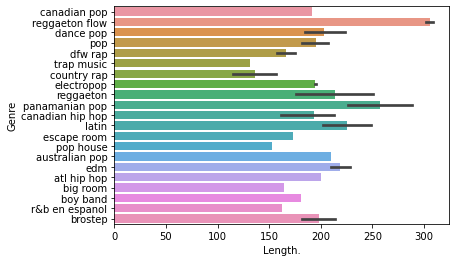

In [43]:
sns.barplot('Length.','Genre',data=df)

### 16. Plot a pie chart of ratings and display the labels.

In [58]:
result = df.groupby('Rating')['Rating'].count()
result

Rating
Bad     18
Good    32
Name: Rating, dtype: int64

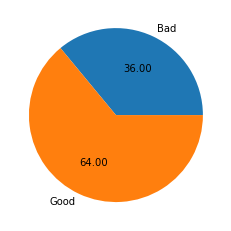

In [61]:
plt.pie(result,labels=result.index,autopct='%0.2f')
plt.show()
#plt.la

### 17. Create a pandas series from below dictionary where indices are subjects:
    {'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
}

In [65]:
data = {'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
}
series = pd.Series(data).apply(pd.Series)
series

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,NaN,NaN,NaN,NaN
History,65.0,NaN,NaN,83.0,78.0,72.0,61.0
Geography,NaN,92.0,76.0,95.0,82.0,75.0,NaN
Mathematics,99.0,89.0,85.0,74.0,NaN,NaN,95.0
Science,89.0,NaN,87.0,NaN,93.0,82.0,78.0


### 18. Convert the above series into DataFrame and replace the null values with zeroes.

In [67]:
df = pd.DataFrame(series).fillna(0)
df

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,0.0,0.0,0.0,0.0
History,65.0,0.0,0.0,83.0,78.0,72.0,61.0
Geography,0.0,92.0,76.0,95.0,82.0,75.0,0.0
Mathematics,99.0,89.0,85.0,74.0,0.0,0.0,95.0
Science,89.0,0.0,87.0,0.0,93.0,82.0,78.0


### 19. Transpose the DataFrame and create a new column Average fill it by calculating average of all subjects.

In [69]:
df_t = df.T
df_t

,English,History,Geography,Mathematics,Science
Sam,60.0,65.0,0.0,99.0,89.0
Jackson,74.0,0.0,92.0,89.0,0.0
Ahree,85.0,0.0,76.0,85.0,87.0
Gloria,0.0,83.0,95.0,74.0,0.0
Isla,0.0,78.0,82.0,0.0,93.0
Aron,0.0,72.0,75.0,0.0,82.0
Gray,0.0,61.0,0.0,95.0,78.0


In [79]:
df_t['Average'] = df_t.apply(lambda x: x.mean(),axis=1)
df_t

,English,History,Geography,Mathematics,Science,Average
Sam,60.0,65.0,0.0,99.0,89.0,62.166667
Jackson,74.0,0.0,92.0,89.0,0.0,54.833333
Ahree,85.0,0.0,76.0,85.0,87.0,69.666667
Gloria,0.0,83.0,95.0,74.0,0.0,42.000000
Isla,0.0,78.0,82.0,0.0,93.0,42.166667
Aron,0.0,72.0,75.0,0.0,82.0,38.166667
Gray,0.0,61.0,0.0,95.0,78.0,39.000000


In [2]:
car_sales_df = pd.read_csv('Car_sales.csv')
car_sales_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
insurance_car_df = pd.read_csv('USA_cars_datasets.csv', index_col=[0])
insurance_car_df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
print(car_sales_df.shape)
print(insurance_car_df.shape)

(157, 16)
(2499, 12)


In [6]:
car_sales_df['Manufacturer'] = car_sales_df['Manufacturer'].str.lower()
car_sales_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [12]:
result = pd.merge(car_sales_df, insurance_car_df,left_on='Manufacturer',right_on='brand', how='left')
result.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,...,door,2008.0,salvage insurance,118250.0,gray,5j8tb18578a010979,167362709.0,michigan,usa,2 days left
1,acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,...,door,2009.0,clean vehicle,179389.0,black,19uua96529a004646,167389316.0,texas,usa,2 hours left
2,acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,...,mdx,2014.0,clean vehicle,63500.0,silver,5fryd3h20eb002546,167775829.0,florida,usa,1 days left
3,acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,...,door,2008.0,salvage insurance,118250.0,gray,5j8tb18578a010979,167362709.0,michigan,usa,2 days left
4,acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,...,door,2009.0,clean vehicle,179389.0,black,19uua96529a004646,167389316.0,texas,usa,2 hours left


In [13]:
result.shape

(23794, 28)

In [18]:
for col in car_sales_df.columns:
    if car_sales_df[col].dtype == 'float64':
        car_sales_df[col].fillna(car_sales_df[col].mean(), inplace=True)
    else:
        car_sales_df[col].fillna(car_sales_df[col].mode(), inplace=True)

In [19]:
car_sales_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,acura,Integra,16.919,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,acura,TL,39.384,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,acura,CL,14.114,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,acura,RL,8.588,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,audi,A4,20.397,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [20]:
car_sales_df.isna().any()

Manufacturer           False
Model                  False
Sales_in_thousands     False
__year_resale_value    False
Vehicle_type           False
Price_in_thousands     False
Engine_size            False
Horsepower             False
Wheelbase              False
Width                  False
Length                 False
Curb_weight            False
Fuel_capacity          False
Fuel_efficiency        False
Latest_Launch          False
Power_perf_factor      False
dtype: bool

### 2. Group by manufacturer and print the average 4- year resale value in descending order.

In [23]:
car_sales_df.groupby('Manufacturer')['__year_resale_value'].mean().sort_values(ascending=False).head()

Manufacturer
porsche       56.475000
mercedes-b    29.648875
audi          28.270000
bmw           27.624325
lexus         25.607321
Name: __year_resale_value, dtype: float64

### 23. Find the best fuel efficient Model and Manufacturer.

In [25]:
car_sales_df[car_sales_df['Fuel_efficiency'] == car_sales_df['Fuel_efficiency'].max()][['Manufacturer','Model']]

,Manufacturer,Model
26,chevrolet,Metro


### 24. Print details of models made by Audi using group by method.

In [39]:
group = car_sales_df.groupby('Manufacturer')
group.get_group('audi')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
4,audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858


In [35]:
result.loc['audi']

4    True
5    True
6    True
Name: Manufacturer, dtype: bool

In [38]:
car_sales_df.iloc[result.loc['audi'].index]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
4,audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858


### 25. Print the data of car where sales in thousands is between 200 to 300.

In [40]:
car_sales_df[(car_sales_df['Sales_in_thousands']>200) & (car_sales_df['Sales_in_thousands']<300)]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
40,dodge,Ram Pickup,227.061,15.060,Car,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,3/6/2012,90.211700
49,ford,Taurus,245.815,10.055,Passenger,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,12/20/2011,62.503740
52,ford,Explorer,276.747,16.640,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496
55,ford,Ranger,220.650,7.850,Car,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,1/14/2012,47.389531
58,honda,Accord,230.902,13.210,Passenger,15.350,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,5/20/2012,54.269548
137,toyota,Camry,247.994,13.245,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2/10/2011,54.372420


### 26. Random sample 20 rows from the dataset

In [41]:
help(car_sales_df.sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will b

In [42]:
car_sales_df.sample(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
156,volvo,S80,18.969,18.072975,Passenger,36.000000,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655
2,acura,CL,14.114,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
102,nissan,Altima,88.094,11.295000,Passenger,20.390000,2.4,155.0,103.1,69.1,183.5,3.012,15.9,25.0,8/2/2011,63.313728
45,dodge,Caravan,181.749,12.025000,Car,19.565000,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,9/1/2011,61.227000
114,plymouth,Neon,32.734,7.750000,Passenger,12.640000,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,4/26/2011,52.084899
32,chrysler,LHS,13.462,17.325000,Passenger,28.340000,3.5,253.0,113.0,74.4,207.7,3.564,17.0,23.0,5/8/2012,101.329281
81,mitsubishi,Galant,55.616,10.595000,Passenger,17.357000,2.4,145.0,103.7,68.5,187.8,2.945,16.3,25.0,1/29/2012,58.606773
133,saturn,LS,49.989,18.072975,Passenger,15.010000,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,12/4/2012,54.819728
39,dodge,Viper,0.916,58.470000,Passenger,69.725000,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
128,saab,3-Sep,12.115,18.072975,Passenger,26.100000,2.0,185.0,102.6,67.4,182.2,2.990,16.9,23.0,6/12/2011,76.023048


### 27. Given below are two DataFrame perform left and right joins respoectively.

In [47]:
df1 = pd.DataFrame({'Name': ['Sam', 'Aron', 'Smith','Lee','Gloria'] ,
 'Age': [18, 27, 18, 27, 17] ,
 'Hobby': ['music','binge-watching','dancing','music','music']})
df2 = pd.DataFrame({'Name': ['Sam', 'Aron', 'Smith','Janna','Cohle'] ,
 'Age': [23, 21, 21, 25, 18],
 'Hobby': ['painting','dancing','dancing','gaming','binge-watching']})

In [48]:
df1

,Name,Age,Hobby
0,Sam,18,music
1,Aron,27,binge-watching
2,Smith,18,dancing
3,Lee,27,music
4,Gloria,17,music


In [49]:
df2

,Name,Age,Hobby
0,Sam,23,painting
1,Aron,21,dancing
2,Smith,21,dancing
3,Janna,25,gaming
4,Cohle,18,binge-watching


In [53]:
# Left Join
pd.merge(df1, df2,left_on='Name',right_on='Name', how='left')

,Name,Age_x,Hobby_x,Age_y,Hobby_y
0,Sam,18,music,23.0,painting
1,Aron,27,binge-watching,21.0,dancing
2,Smith,18,dancing,21.0,dancing
3,Lee,27,music,NaN,NaN
4,Gloria,17,music,NaN,NaN


In [54]:
# Right Join
pd.merge(df1, df2,left_on='Name',right_on='Name', how='right')

,Name,Age_x,Hobby_x,Age_y,Hobby_y
0,Sam,18.0,music,23,painting
1,Aron,27.0,binge-watching,21,dancing
2,Smith,18.0,dancing,21,dancing
3,Janna,NaN,NaN,25,gaming
4,Cohle,NaN,NaN,18,binge-watching


### 28. Create pandas dataframe having keys and ltable and rtable as below -
  'key': ['One', 'Two'], 'ltable': [1, 2]
  'key': ['One', 'Two'], 'rtable': [4, 5]
  Merge both the tables based of key

In [61]:
df1 = pd.DataFrame({'key': ['One', 'Two'], 'ltable': [1, 2]})
df2 = pd.DataFrame({'key': ['One', 'Two'], 'rtable': [4, 5]})

In [62]:
df1

,key,ltable
0,One,1
1,Two,2


In [63]:
df2

,key,rtable
0,One,4
1,Two,5


In [64]:
pd.merge(df1, df2, how='inner', left_on=['key'], right_on= ['key'])

,key,ltable,rtable
0,One,1,4
1,Two,2,5


### 29. Create a Python DataFrame from the below data:

In [65]:
fruits=pd.DataFrame({'Food':['Blueberries','Cranberries','Cherrries','Coconut'],
 'PortionSize':['100g','100g','120g','110g'],
 'Calories': [30,15,39,351],
 'K joules':[128,65,168,1446]})
fruits

,Food,PortionSize,Calories,K joules
0,Blueberries,100g,30,128
1,Cranberries,100g,15,65
2,Cherrries,120g,39,168
3,Coconut,110g,351,1446


### 30. Calculate the percentile rank of the Test_score column and add a new column specifying the percentiles.

In [67]:
my_dict={'Name':['Gloria','Aron','Janna','Mia','Jackson','Sylphia','Jim'],
 'Test_score':[52,73,65,84,62,66,93]}
df = pd.DataFrame(my_dict)
df

,Name,Test_score
0,Gloria,52
1,Aron,73
2,Janna,65
3,Mia,84
4,Jackson,62
5,Sylphia,66
6,Jim,93


In [85]:
df['Percentiles'] = df['Test_score'].rank(pct=True)
df 

,Name,Test_score,Percentiles
0,Gloria,52,0.142857
1,Aron,73,0.714286
2,Janna,65,0.428571
3,Mia,84,0.857143
4,Jackson,62,0.285714
5,Sylphia,66,0.571429
6,Jim,93,1.000000


In [80]:
np.percentile(df['Test_score'],52)

66.84

In [77]:
df['Test_score'].quantile()

66.0